In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [149]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

In [150]:
train.shape

(5429, 9)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


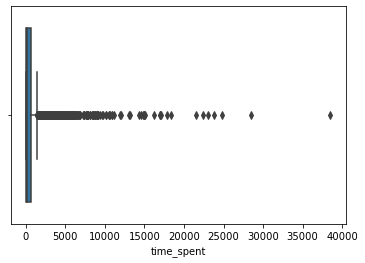

In [151]:
sns.boxplot(train['time_spent'])

In [152]:
train['time_spent'].describe()

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
25%         22.699000
50%         98.312000
75%        600.463000
max      38494.025000
Name: time_spent, dtype: float64

In [153]:
train['time_spent'].median()

98.312

In [154]:
Q1 = 22.699
Q3 = 600.463
IQR = Q3-Q1
out_val = Q3+(1.5*IQR)
out_val

1467.109

In [155]:
train = train[train['time_spent']<10000]
train.shape

(5398, 9)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


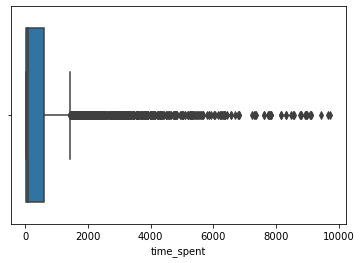

In [156]:
sns.boxplot(train['time_spent'],whis = 1.5)
plt.show()

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5398 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5398 non-null   object 
 1   session_number  5398 non-null   int64  
 2   client_agent    5238 non-null   object 
 3   device_details  5398 non-null   object 
 4   date            5398 non-null   object 
 5   purchased       5398 non-null   int64  
 6   added_in_cart   5398 non-null   int64  
 7   checked_out     5398 non-null   int64  
 8   time_spent      5398 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 421.7+ KB


In [158]:
train['date'] = train['date'].astype('datetime64')
test['date'] = test['date'].astype('datetime64')

In [159]:
train['month'] = [i.month for i in train['date']]
test['month'] = [i.month for i in test['date']]

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


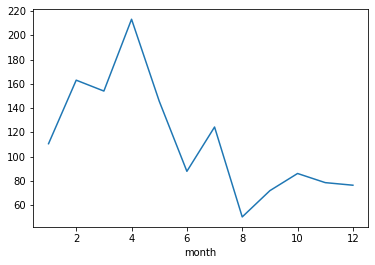

In [160]:
t = train.groupby('month')['time_spent'].median()
sns.lineplot(t.index,t.values)

In [161]:
train.groupby('month')['time_spent'].median().values

array([110.61  , 163.0095, 154.029 , 213.255 , 145.695 ,  87.84  ,
       124.369 ,  50.227 ,  71.891 ,  86.043 ,  78.5075,  76.3715])

In [162]:
train['day'] = [i.day for i in train['date']]
test['day'] = [i.day for i in test['date']]

In [163]:
train.drop(['date','session_id'],axis = 1,inplace = True)
test.drop(['date','session_id'],axis = 1,inplace = True)

In [164]:
# train['client_agent'] = train['client_agent'].fillna("Unknown/")
# train['browser'] = [i.partition('/')[0] for i in train['client_agent']]
# train['browser'] = train['browser'].replace({'-unknown-':'Unknown','Typhoeus - https:':'Typhoeus'})

In [165]:
# train['browser'].value_counts()

In [166]:
train.drop('client_agent',axis = 1,inplace = True)
test.drop('client_agent',axis = 1,inplace = True)

In [167]:
train['device'] = [i.split('-')[0].strip() for i in train['device_details']]
test['device'] = [i.split('-')[0].strip() for i in test['device_details']]
train['platform'] = [i.split('-')[1].strip() for i in train['device_details']]
test['platform'] = [i.split('-')[1].strip() for i in test['device_details']]

In [168]:
train.drop('device_details',axis = 1,inplace = True)
test.drop('device_details',axis = 1,inplace = True)

In [169]:
train['device'].unique()

array(['Desktop', 'iPhone', 'Android Phone', 'Android Tablet', 'iPad',
       'Other', 'Unknown'], dtype=object)

In [170]:
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [171]:
# train['device'] = train['device'].replace(train['device'].unique(),range(len(train['device'].unique())))
# train['platform'] = train['platform'].replace(train['platform'].unique(),range(len(train['platform'].unique())))

In [172]:
model = ols("time_spent~session_number+purchased+added_in_cart+checked_out+month+day+device+platform",data = train).fit()
d = sm.stats.anova_lm(model)
d[d.loc[:,'PR(>F)']<0.05]

,df,sum_sq,mean_sq,F,PR(>F)
device,6.0,1.345016e+08,2.241693e+07,21.310177,7.315086e-25
platform,8.0,1.350702e+08,1.688378e+07,16.050202,1.204113e-23
session_number,1.0,4.962764e+06,4.962764e+06,4.717746,2.989639e-02
purchased,1.0,4.720507e+08,4.720507e+08,448.744908,1.001096e-95
added_in_cart,1.0,4.565607e+08,4.565607e+08,434.019708,9.166329e-93
checked_out,1.0,8.768431e+07,8.768431e+07,83.355220,9.510185e-20


In [173]:
# train.drop(d[d.loc[:,'PR(>F)']>0.05].index,axis = 1,inplace = True)
# test.drop(d[d.loc[:,'PR(>F)']>0.05].index,axis = 1,inplace = True)

In [174]:
# coded = pd.get_dummies(train['platform'],drop_first = True)

In [175]:
# train = pd.concat((train,coded),axis = 1)

In [176]:
# coded2 = pd.get_dummies(train['device'],drop_first = True)
# train = pd.concat((train,coded2),axis = 1)

In [177]:
# train = train.drop(['device','platform'],axis = 1)

In [178]:
train['device'].replace(train['device'].unique(),range(len(train['device'].unique())),inplace = True)
train['platform'].replace(train['platform'].unique(),range(len(train['platform'].unique())),inplace = True)

test['device'].replace(test['device'].unique(),range(len(test['device'].unique())),inplace = True)
test['platform'].replace(test['platform'].unique(),range(len(test['platform'].unique())),inplace = True)

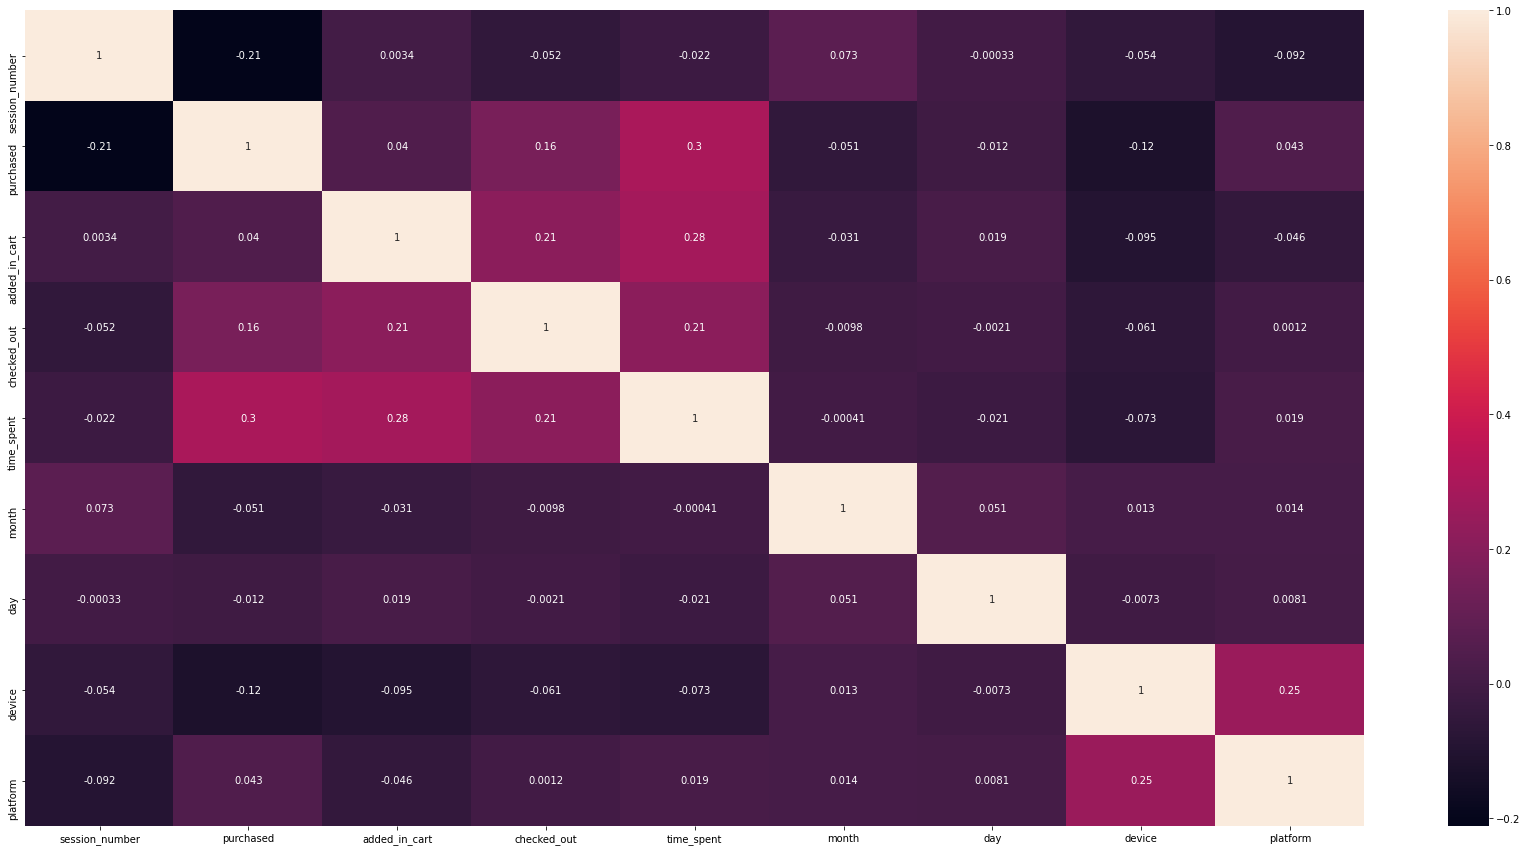

In [179]:
plt.figure(figsize = (30,15))
sns.heatmap(train.corr(),annot = True)
plt.show()

###### ML algorithms

In [180]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [182]:
X = train.drop('time_spent',axis = 1)
y = train['time_spent']

In [183]:
train.shape,test.shape

((5398, 9), (2327, 8))

In [184]:
def scoring(y_test,y_pred):
    y_pred = abs(y_pred)
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

# Linear Regression

In [185]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
y = train['time_spent']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =6)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4318, 8), (1080, 8), (4318,), (1080,))

In [186]:
lr = Ridge()
lr.fit(x_train,y_train)
y_pred = abs(lr.predict(x_test))
scoring(y_test,y_pred),lr.score(x_test,y_test)

(1.8562728927826115, 0.11238575836264397)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


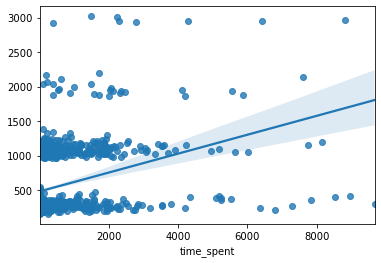

In [187]:
sns.regplot(y_test,y_pred)

# KNN regressor

In [188]:
from sklearn.neighbors import KNeighborsRegressor

In [189]:
KNN = KNeighborsRegressor(n_neighbors = 3,n_jobs = -1,leaf_size = 17)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
scoring(y_test,y_pred)

2.1308070880202514

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


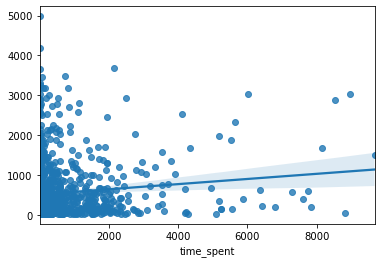

In [190]:
sns.regplot(y_test,y_pred)

# Bag_RandomForest

In [191]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

In [192]:
bp = {'criterion': 'mae',
 'min_samples_leaf': 12,
 'min_samples_split': 10,
 'n_estimators': 29}

In [193]:
Bag_KNN = BaggingRegressor(RandomForestRegressor(n_estimators = 29,criterion = 'mae',min_samples_leaf = 12,min_samples_split = 10),n_jobs = -1)
Bag_KNN.fit(x_train,y_train)
y_pred = Bag_KNN.predict(x_test)
scoring(y_test,y_pred)

1.4419681770134898

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


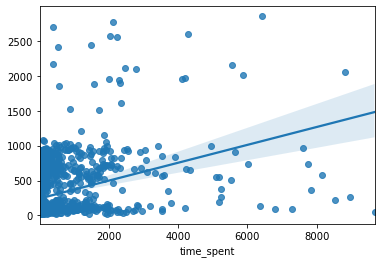

In [194]:
sns.regplot(y_test,y_pred)

In [142]:
# predictions = Bag_KNN.predict(test)
# pred = pd.DataFrame(predictions,columns = ['time_spent'])
# pred.to_csv('Submissions/RandomBagged.csv',index = False)

In [143]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [144]:
polyreg = make_pipeline(
        PolynomialFeatures(degree=1),
        LinearRegression()
        )
        
polyreg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [145]:
y_pred = polyreg.predict(x_test)

In [146]:
scoring(y_test,y_pred)

1.8568208974847256

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


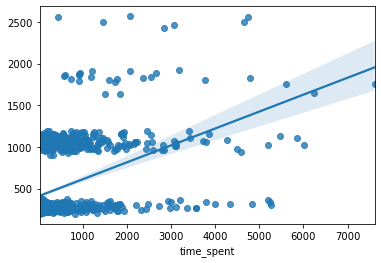

In [147]:
sns.regplot(y_test,y_pred)